# Data Import and Data Exploration

In [64]:
import pandas as pd

In [65]:
df_booking=pd.read_csv('../Hotel_Project.py/fact_bookings.csv')
df_booking.head(5)
df_booking.tail(5)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [67]:
df_booking.loc[1:6:2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100


In [12]:
df_booking.shape

(134590, 12)

In [13]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [14]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [15]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

<Axes: xlabel='booking_platform'>

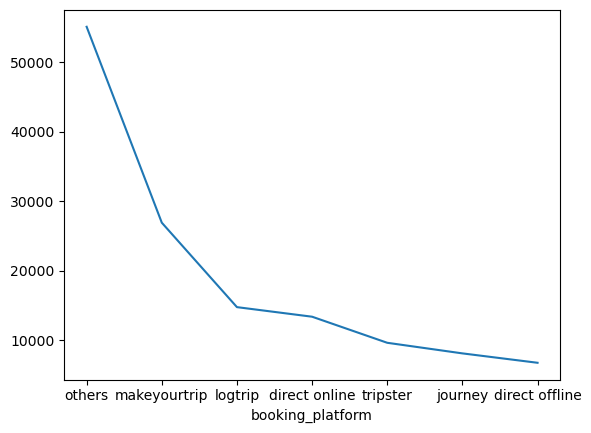

In [105]:
df_booking.booking_platform.value_counts().plot(kind = "line")


In [18]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [25]:
df_booking.revenue_generated.min() , df_booking.revenue_generated.max()

(6500, 45220)

In [32]:
df_date= pd.read_csv('../Hotel_Project.py/dim_date.csv')
df_hotels=pd.read_csv('../Hotel_Project.py/dim_hotels.csv')
df_rooms=pd.read_csv('../Hotel_Project.py/dim_rooms.csv')
df_agg_bookings=pd.read_csv('../Hotel_Project.py/fact_aggregated_bookings.csv')


In [33]:
df_hotels.shape

(25, 4)

In [34]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [35]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='count'>

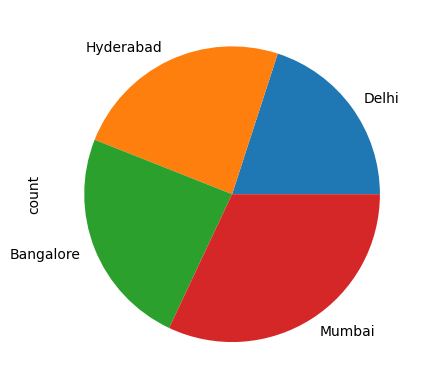

In [104]:
df_hotels.city.value_counts().sort_values().plot(kind='pie')

# Aggregate Bookings

In [37]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


# Find out unique property ids in aggregate bookings dataset

In [38]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

# Find out total bookings per property_id

In [39]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

# Find out days on which bookings are less than capacity

In [82]:
df_agg_bookings[ df_agg_bookings.successful_bookings < df_agg_bookings.capacity ]
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


# Find out properties that have highest capacity

In [44]:
df_agg_bookings.capacity.max()

50

In [45]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


# Data cleaning

In [46]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [52]:
df_booking[df_booking.no_guests <= 1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
9,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,2022-04-29,2022-05-01,2022-05-07,1,RT1,makeyourtrip,5.0,Checked Out,9100,9100
13,May012216558RT114,16558,2022-04-30,2022-05-01,2022-05-05,1,RT1,logtrip,NaN,Cancelled,9100,3640
20,May012216558RT23,16558,2022-04-10,2022-05-01,2022-05-07,1,RT2,makeyourtrip,NaN,Checked Out,12600,12600
22,May012216558RT25,16558,2022-04-26,2022-05-01,2022-05-02,1,RT2,direct offline,NaN,Cancelled,12600,5040
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134583,Jul312217564RT44,17564,2022-07-31,2022-07-31,2022-08-01,1,RT4,others,NaN,Cancelled,32300,12920
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [53]:
df_booking[df_booking.no_guests >0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [54]:
df_booking.shape

(134590, 12)

In [56]:
df_booking.revenue_generated.min() , df_booking.revenue_generated.max()

(6500, 45220)

# In aggregate bookings find columns that have null values. Fill these null values with
whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [78]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [79]:
df_agg_bookings=df_agg_bookings.fillna(df_agg_bookings.capacity.mean())
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


# In aggregate bookings find out records that have successful_bookings value greater than
capacity. Filter those records

In [85]:
df_agg_bookings[df_agg_bookings.successful_bookings >= df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
24,19562,01-May-22,RT2,23,23
29,16561,01-May-22,RT2,24,24
60,16561,01-May-22,RT3,21,21
69,16558,01-May-22,RT3,8,8
99,16558,01-May-22,RT4,3,3
...,...,...,...,...,...
7699,16558,16-Jul-22,RT4,3,3
7999,16558,19-Jul-22,RT4,3,3
8399,16558,23-Jul-22,RT4,3,3
8499,16558,24-Jul-22,RT4,3,3


# Data Transformation

In [86]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [88]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


# Insights Generation

**1. What is an average occupancy rate in each of room categories?**

In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

In [90]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [91]:
import pandas as pd

In [92]:
df=pd.merge(df_agg_bookings,df_hotels , on="property_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city
0,16559,01-May-22,RT1,25,30,Atliq Exotica,Luxury,Mumbai
1,16559,01-May-22,RT2,35,41,Atliq Exotica,Luxury,Mumbai
2,16559,01-May-22,RT3,27,32,Atliq Exotica,Luxury,Mumbai
3,16559,01-May-22,RT4,17,18,Atliq Exotica,Luxury,Mumbai


**3. When was the occupancy better? Weekday or Weekend?**

In [98]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city
0,16559,01-May-22,RT1,25,30,Atliq Exotica,Luxury,Mumbai
1,16559,01-May-22,RT2,35,41,Atliq Exotica,Luxury,Mumbai
2,16559,01-May-22,RT3,27,32,Atliq Exotica,Luxury,Mumbai
3,16559,01-May-22,RT4,17,18,Atliq Exotica,Luxury,Mumbai
4,16559,02-May-22,RT1,20,30,Atliq Exotica,Luxury,Mumbai


In [99]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [100]:
df=pd.merge(df , df_date , left_on="check_in_date" , right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend


**4. In the month of june, what is the occupancy for diffrent cities**

In [101]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend


In [102]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [103]:
df_june_22 = df[df["mmm yy"]=="jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,date,mmm yy,week no,day_type


In [106]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_booking["property_name"].unique()

In [111]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [112]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


In [113]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [114]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB
